In [1]:
#importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
# from pandas_profiling import ProfileReport

In [3]:
#Basic data exploration
df=pd.read_csv('https://raw.githubusercontent.com/Saket046/video-games-sales-data-analysis/main/vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.set_index('Rank', inplace=True)
df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [6]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
#cleaning data
df=df.replace({
    np.NaN: 'not known'
})

In [9]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  object 
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [12]:
#data cleaning
datatype=df.dtypes
datatype

Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [13]:
df['NA_Sales']=pd.to_numeric(df['NA_Sales'])
df['EU_Sales']=pd.to_numeric(df['EU_Sales'])
df['JP_Sales']=pd.to_numeric(df['JP_Sales'])
df['Other_Sales']=pd.to_numeric(df['Other_Sales'])
df['Global_Sales']=pd.to_numeric(df['Global_Sales'])

In [14]:
datatype=df.dtypes
datatype

Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [15]:
#df['Year']=df['Year'].astype('int64')
#so we have not known as a record in year which can't be changed into int, thus will generate a error
####getting years that have not known as record.
wrongdata=df[df['Year']=='not known']
wrongdata

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,not known,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,not known,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,not known,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,not known,Fighting,not known,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,not known,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,not known,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,not known,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,not known,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


In [16]:
#we will drop these 271 rows.
df[df['Year']=='not known']=np.nan
df.dropna(axis=0,inplace=True)

In [17]:
df[df['Year']=='not known']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,


In [18]:
df['Year']=df['Year'].astype('int64')

In [19]:
datatype=df.dtypes
datatype

Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [20]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


top 10 companies in terms of sales???

In [21]:
##creating a column which have total sales 
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']+df['Global_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75


In [22]:
toppublisher=df.groupby(['Publisher']).sum()
toppublisher.drop(['Year'],axis=1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Publisher,,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11,0.22
1C Company,0.01,0.07,0.00,0.02,0.10,0.20
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94,3.87
2D Boy,0.00,0.03,0.00,0.01,0.04,0.08
3DO,6.48,3.04,0.00,0.63,10.12,20.27
...,...,...,...,...,...,...
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04,0.08
inXile Entertainment,0.02,0.06,0.00,0.01,0.10,0.19
"mixi, Inc",0.00,0.00,0.86,0.00,0.86,1.72


In [23]:
####answer of top 10 companies in terms of sales.
toppublisher.sort_values(by=['Total_Sales'],ascending=False).head(10)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Publisher,,,,,,,
Nintendo,1394666,815.75,418.30,454.99,95.19,1784.43,3568.66
Electronic Arts,2686562,584.22,367.38,13.98,127.63,1093.39,2186.60
Activision,1938979,426.01,213.72,6.54,74.79,721.41,1442.47
Sony Computer Entertainment,1367034,265.22,187.55,74.10,80.40,607.28,1214.55
Ubisoft,1843194,252.81,163.03,7.33,50.16,473.54,946.87
Take-Two Interactive,827344,220.47,117.95,5.83,55.20,399.30,798.75
THQ,1428311,208.60,94.60,5.01,32.11,340.44,680.76
Konami Digital Entertainment,1650392,88.91,68.62,90.93,29.91,278.56,556.93
Sega,1267395,108.78,81.41,56.19,24.30,270.70,541.38


In [24]:
top=toppublisher.sort_values(by=['Total_Sales'],ascending=False).head(10)
s=top.xs('Total_Sales', axis=1)
s

Publisher
Nintendo                        3568.66
Electronic Arts                 2186.60
Activision                      1442.47
Sony Computer Entertainment     1214.55
Ubisoft                          946.87
Take-Two Interactive             798.75
THQ                              680.76
Konami Digital Entertainment     556.93
Sega                             541.38
Namco Bandai Games               507.12
Name: Total_Sales, dtype: float64

Text(0, 0.5, 'Total Sales ($)')

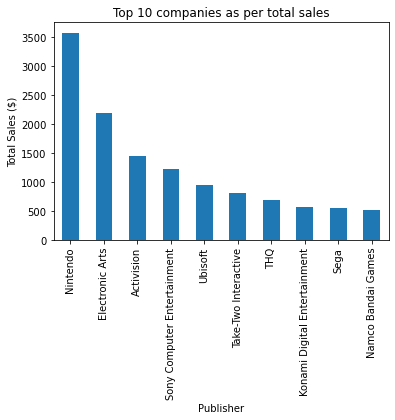

In [25]:
#plotting a barchart
p1=s.plot(kind='bar',title='Top 10 companies as per total sales')
plt.ylabel('Total Sales ($)')

what is the order of genre of the games in the market ??

In [26]:
df.groupby(['Genre']).count().sort_values(by=['Total_Sales'],ascending=False)

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Genre,,,,,,,,,,
Action,3253,3253,3253,3253,3253,3253,3253,3253,3253,3253
Sports,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304
Misc,1710,1710,1710,1710,1710,1710,1710,1710,1710,1710
Role-Playing,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471
Shooter,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282
Adventure,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276
Racing,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
Platform,876,876,876,876,876,876,876,876,876,876
Simulation,851,851,851,851,851,851,851,851,851,851


In [27]:
gen=df.groupby(['Genre']).count().sort_values(by=['Total_Sales'],ascending=False)
g=gen.xs('Total_Sales', axis=1)
g

Genre
Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Total_Sales, dtype: int64

Text(0, 0.5, 'Counts')

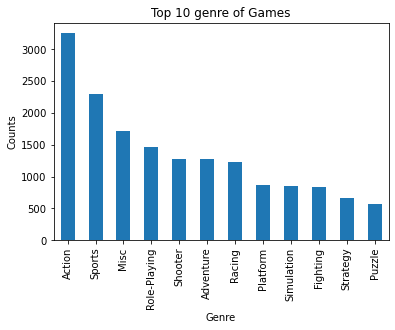

In [28]:
#plotting a graph
p2=g.plot(kind='bar',title='Top 10 genre of Games')
plt.ylabel('Counts')

Top 10 favorite platform for gamers??

In [29]:
df.groupby(['Platform']).count()

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Platform,,,,,,,,,,
2600,116,116,116,116,116,116,116,116,116,116
3DO,3,3,3,3,3,3,3,3,3,3
3DS,500,500,500,500,500,500,500,500,500,500
DC,52,52,52,52,52,52,52,52,52,52
DS,2133,2133,2133,2133,2133,2133,2133,2133,2133,2133
GB,97,97,97,97,97,97,97,97,97,97
GBA,811,811,811,811,811,811,811,811,811,811
GC,542,542,542,542,542,542,542,542,542,542
GEN,27,27,27,27,27,27,27,27,27,27


In [30]:
plat=df.groupby(['Platform']).count().sort_values(by=['Total_Sales'],ascending=False).head(10)
plat

,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Platform,,,,,,,,,,
DS,2133,2133,2133,2133,2133,2133,2133,2133,2133,2133
PS2,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127
PS3,1304,1304,1304,1304,1304,1304,1304,1304,1304,1304
Wii,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
X360,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
PSP,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
PS,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
PC,943,943,943,943,943,943,943,943,943,943
GBA,811,811,811,811,811,811,811,811,811,811


In [31]:
f=plat.xs('Total_Sales', axis=1)
f

Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
Name: Total_Sales, dtype: int64

Text(0, 0.5, 'Counts')

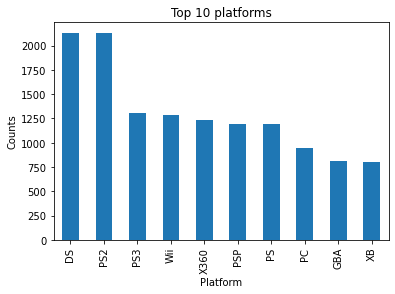

In [32]:
#plotting a graph
p3=f.plot(kind='bar',title='Top 10 platforms')
plt.ylabel('Counts')

which year was best for game industries??

In [33]:
df.groupby(['Year']).sum().sort_values(by=['Total_Sales'],ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Year,,,,,,
2008,351.44,184.40,60.26,82.39,678.90,1357.39
2009,338.85,191.59,61.89,74.77,667.30,1334.40
2007,312.05,160.50,60.29,77.60,611.13,1221.57
2010,304.24,176.73,59.49,59.90,600.45,1200.81
2006,263.12,129.24,73.73,54.43,521.04,1041.56
2011,241.06,167.44,53.04,54.39,515.99,1031.92
2005,242.61,121.94,54.28,40.58,459.94,919.35
2004,222.59,107.32,41.65,47.29,419.31,838.16
2002,216.19,109.74,41.76,27.28,395.52,790.49


In [34]:
year=df.groupby(['Year']).sum()
y=year.xs('Total_Sales', axis=1)
y

Year
1980      22.76
1981      71.45
1982      57.74
1983      33.59
1984     100.71
1985     107.89
1986      74.15
1987      43.44
1988      94.43
1989     146.90
1990      98.76
1991      64.46
1992     152.30
1993      91.97
1994     158.39
1995     176.22
1996     398.30
1997     402.05
1998     512.80
1999     502.39
2000     403.19
2001     662.96
2002     790.49
2003     715.46
2004     838.16
2005     919.35
2006    1041.56
2007    1221.57
2008    1357.39
2009    1334.40
2010    1200.81
2011    1031.92
2012     726.84
2013     736.09
2014     674.15
2015     528.70
2016     141.80
2017       0.10
2020       0.58
Name: Total_Sales, dtype: float64

Text(0, 0.5, 'Revenue Generated')

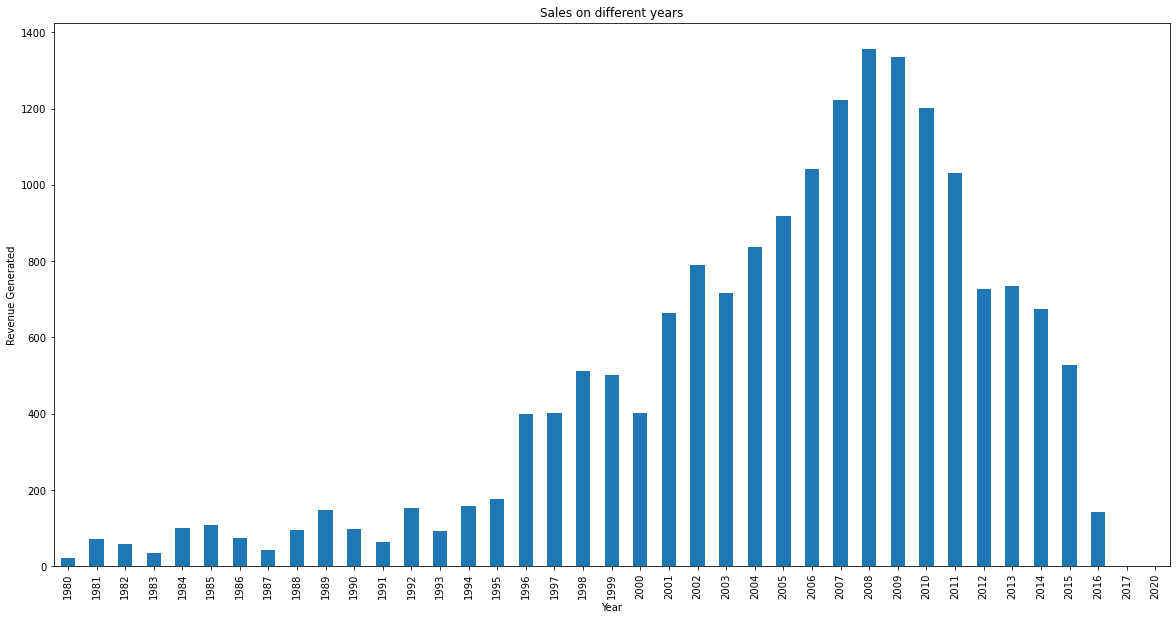

In [35]:
#plotting a graph
plt.figure(figsize=(20, 10))
p4=y.plot(kind='bar',title='Sales on different years')
plt.ylabel('Revenue Generated')